In [1950]:
SAMPLE_LENGTH = 12
PREDICT_LENGTH = 6

https://blog.csdn.net/weixin_39653948/article/details/105385622

In [1951]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Flatten, Bidirectional
from tensorflow.keras.layers import TimeDistributed, RepeatVector
import pandas as pd

### 數據處理
* 切割出 train_seq 與對應之 train_seq_label_seq，以及 test_seq

### 測試數據一

In [1952]:
# import pandas as pd
# df = pd.read_csv('data/event/Siou_Luan/秀巒_event2_201009.csv')
# df['Time'] = pd.to_datetime(df['Time'])

In [1953]:
# start, end = 0, 50
# Y = df[['rain_白石']][start:end]
# X = df[['Time']][start:end]
# plt.plot(X, Y)
# plt.show()

In [1954]:
# test_seq = np.array(df[['rain_白石']][26-sample_length:26])
# test_seq

#### 測試數據二

In [1955]:
pop_index = 6

import os
target_folder_path = 'data/event/Siou_Luan'
list_of_all_file = os.listdir(target_folder_path)

print(list_of_all_file)
test_seq_path = list_of_all_file.pop(pop_index)
print(list_of_all_file)

['秀巒_event10_201005.csv', '秀巒_event1_201002_多峰.csv', '秀巒_event2_201009.csv', '秀巒_event3_200809.csv', '秀巒_event4_200910.csv', '秀巒_event5_201206.csv', '秀巒_event6_201308.csv', '秀巒_event7_201407.csv', '秀巒_event8_201507.csv', '秀巒_event9_200803.csv']
['秀巒_event10_201005.csv', '秀巒_event1_201002_多峰.csv', '秀巒_event2_201009.csv', '秀巒_event3_200809.csv', '秀巒_event4_200910.csv', '秀巒_event5_201206.csv', '秀巒_event7_201407.csv', '秀巒_event8_201507.csv', '秀巒_event9_200803.csv']


In [1956]:
print(len(list_of_all_file))


9


### 將 train_data 切成 train_seq 與對應 label

In [1957]:
from sklearn.preprocessing import MinMaxScaler

秀巒_event10_201005.csv


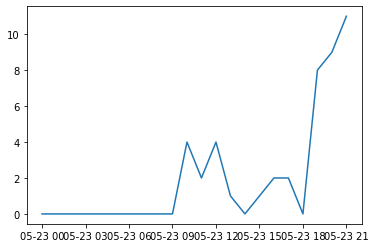

秀巒_event1_201002_多峰.csv


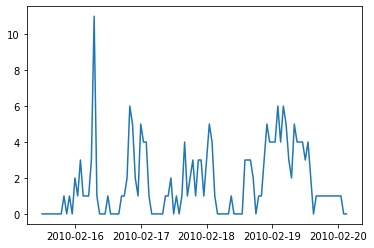

秀巒_event2_201009.csv


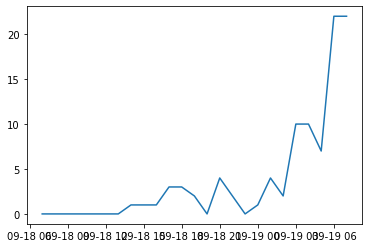

秀巒_event3_200809.csv


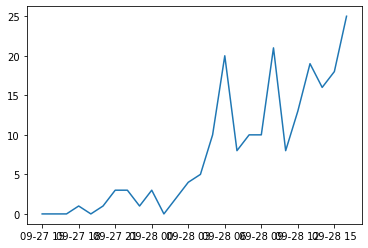

秀巒_event4_200910.csv


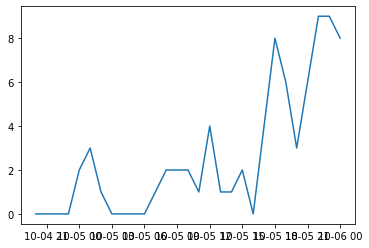

秀巒_event5_201206.csv


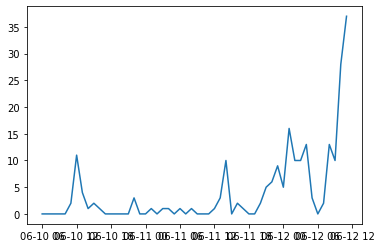

秀巒_event7_201407.csv


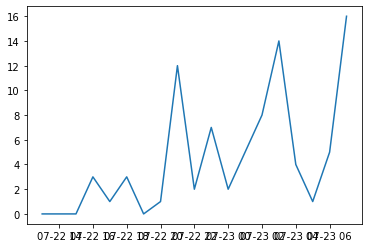

秀巒_event8_201507.csv


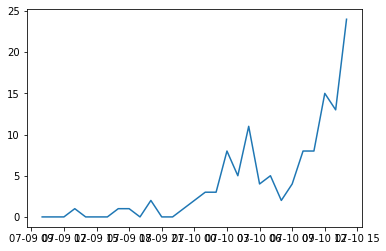

秀巒_event9_200803.csv


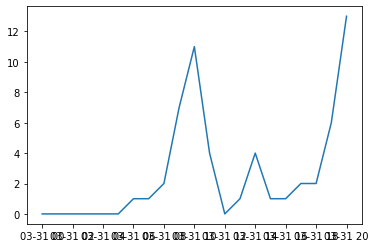

In [1958]:
sample_length = SAMPLE_LENGTH
predict_length = PREDICT_LENGTH

train_seq = []
train_seq_label_seq = []

for file_index in range(len(list_of_all_file)):
    print(list_of_all_file[file_index])
    target_df = pd.read_csv('data/event/Siou_Luan_Ver2/'+str(list_of_all_file[file_index]))
    target_df['Time'] = pd.to_datetime(target_df['Time'])

    '''將降雨量/流量 標準化'''
    df_dimension = int(target_df.shape[0])
    Y = target_df[['rain_白石']]
    # scaler = MinMaxScaler(feature_range=(0, 1)).fit(Y)
    # Y = scaler.transform(Y)

    Z = target_df[['Flow']]
    # scaler = MinMaxScaler(feature_range=(0, 1)).fit(Z)
    # Z = scaler.transform(Z)

    X = target_df[['Time']]
    plt.plot(X, Y)
    # plt.plot(X, Z)
    plt.show()

    for i in range(len(Y)):
        if i+sample_length+predict_length < len(Y)+1:
            train_seq.append(Y[i:i+sample_length])
            train_seq_label_seq.append(Y[i+sample_length:i+sample_length+predict_length])

In [1959]:
# target_folder_path = 'data/event/Siou_Luan'
# list_of_all_file = os.listdir(target_folder_path)
# list_of_all_file.pop(pop_index)
# for file_index in range(len(list_of_all_file)):
#     print(list_of_all_file[file_index])
#     target_df = pd.read_csv('data/event/Siou_Luan/'+str(list_of_all_file[file_index]))
#     target_df['Time'] = pd.to_datetime(target_df['Time'])
#
#     '''將降雨量/流量 標準化'''
#     df_dimension = int(target_df.shape[0])
#     Y = target_df[['rain_白石']]
#     # scaler = MinMaxScaler(feature_range=(0, 1)).fit(Y)
#     # Y = scaler.transform(Y)
#
#     Z = target_df[['Flow']]
#     # scaler = MinMaxScaler(feature_range=(0, 1)).fit(Z)
#     # Z = scaler.transform(Z)
#
#     X = target_df[['Time']]
#     plt.plot(X, Y)
#     # plt.plot(X, Z)
#     plt.show()
#
#     for i in range(len(Y)):
#         if i+sample_length+predict_length < len(Y)+1:
#             train_seq.append(Y[i:i+sample_length])
#             train_seq_label_seq.append(Y[i+sample_length:i+sample_length+predict_length])

In [1960]:
# target_folder_path = 'data/event/Leng_Jiao'
# list_of_all_file = os.listdir(target_folder_path)
# for file_index in range(len(list_of_all_file)):
#     print(list_of_all_file[file_index])
#     target_df = pd.read_csv('data/event/Leng_Jiao/'+str(list_of_all_file[file_index]))
#     target_df['Time'] = pd.to_datetime(target_df['Time'])
#
#     '''將降雨量/流量 標準化'''
#     df_dimension = int(target_df.shape[0])
#     Y = target_df[['rain_嘎拉賀']]
#     scaler = MinMaxScaler(feature_range=(0, 1)).fit(Y)
#     Y = scaler.transform(Y)
#
#     Z = target_df[['Flow']]
#     scaler = MinMaxScaler(feature_range=(0, 1)).fit(Z)
#     Z = scaler.transform(Z)
#
#     X = target_df[['Time']]
#     plt.plot(X, Y)
#     # plt.plot(X, Z)
#     plt.show()
#
#     for i in range(len(Y)):
#         if i+sample_length+predict_length < len(Y)+1:
#             train_seq.append(Y[i:i+sample_length])
#             train_seq_label_seq.append(Y[i+sample_length:i+sample_length+predict_length])

#### 決定 test sequence

秀巒_event6_201308.csv


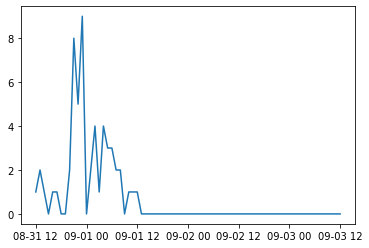

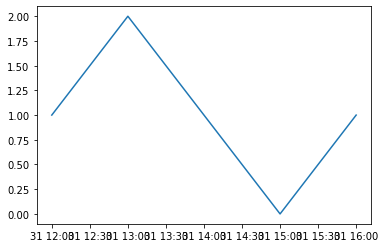

test sequence: 
   rain_白石
0      1.0
1      2.0
2      1.0
3      0.0
4      1.0
absolute rainfall: 
    rain_白石
5       1.0
6       0.0
7       0.0
8       2.0
9       8.0
10      5.0
absolute flow: 
     Flow
5   45.42
6   46.89
7   46.89
8   49.95
9   53.18
10  60.18
test sequence: 
0    1.0
1    2.0
2    1.0
3    0.0
4    1.0
Name: rain_白石, dtype: float64
absolute rainfall: 
[1. 0. 0. 2. 8. 5.]
absolute flow: 
[45.42 46.89 46.89 49.95 53.18 60.18]


In [1961]:
test_seq_start_index = 5
print(test_seq_path)
test_data_df = pd.read_csv('data/event/Siou_Luan/'+str(test_seq_path))
test_data_df['Time'] = pd.to_datetime(test_data_df['Time'])

Z = test_data_df[['Flow']]
Y = test_data_df[['rain_白石']]
X = test_data_df[['Time']]

'''標準化'''
# scaler = MinMaxScaler(feature_range=(0, 1)).fit(Y)
# Y = scaler.transform(Y)
#
# scaler = MinMaxScaler(feature_range=(0, 1)).fit(Z)
# Z = scaler.transform(Z)

plt.plot(X, Y)
plt.show()

Z_plot = Z[:test_seq_start_index]
Y_plot = Y[:test_seq_start_index]
X_plot = X[:test_seq_start_index]
plt.plot(X_plot, Y_plot)
plt.show()

test_seq = Y_plot[-sample_length:]

print(f'test sequence: \n{test_seq}')
print(f'absolute rainfall: \n{Y[test_seq_start_index:test_seq_start_index+predict_length]}')
print(f'absolute flow: \n{Z[test_seq_start_index:test_seq_start_index+predict_length]}')
print(f'test sequence: \n{np.squeeze(test_seq)}')
print(f'absolute rainfall: \n{np.squeeze(np.array(Y[test_seq_start_index:test_seq_start_index+predict_length]))}')
print(f'absolute flow: \n{np.squeeze(np.array(Z[test_seq_start_index:test_seq_start_index+predict_length]))}')

In [1962]:
ttt = np.arange(3)
print(ttt)
np.pad(ttt,(3,0),'constant',constant_values=0)

[0 1 2]


array([0, 0, 0, 0, 1, 2])

In [1963]:
tt = np.arange(10)
print(tt)
print(tt[-3:])

[0 1 2 3 4 5 6 7 8 9]
[7 8 9]


In [1964]:
sliding_window_width = len(train_seq[0])
n_features = 1

train_seq = np.array(train_seq)
train_seq_label_seq = np.array(train_seq_label_seq)
test_seq = np.squeeze(np.array(test_seq))

'''補足test_seq維度'''
if len(test_seq) < sample_length:
    test_seq = np.pad(test_seq,(sample_length-len(test_seq),0),'constant',constant_values=0)

train_seq = train_seq.reshape((train_seq.shape[0], train_seq.shape[1], n_features))
train_seq_label_seq = train_seq_label_seq.reshape((train_seq_label_seq.shape[0], train_seq_label_seq.shape[1]))
test_seq = test_seq.reshape((1, test_seq.shape[0], n_features))

In [1965]:
print(f'shape of train sequence :{train_seq.shape}')
print(f'shape of train sequence label:{train_seq_label_seq.shape}')
print(f'shape of test sequence:{test_seq.shape}')

shape of train sequence :(184, 12, 1)
shape of train sequence label:(184, 6)
shape of test sequence:(1, 12, 1)


In [1966]:
ACTIVATION = 'tanh'
LSTM_LAYER_INPUT_SIZE = 200
class MultiStepModels:
    '''
    多時間步 預測 時間序列 LSTM 模型
    '''

    def __init__(self, train_seq, train_seq_label_seq, test_seq, sw_width, pred_length,
                 features, epochs_num, verbose_set, flag = 0):
        self.train_seq = train_seq
        self.train_seq_label_seq = train_seq_label_seq
        self.test_seq = test_seq
        self.sw_width = sw_width
        self.pred_length = pred_length

        self.features = features
        self.epochs_num = epochs_num

        # verbose = 0 为不在标准输出流输出日志信息
        # verbose = 1 为输出进度条记录
        # verbose = 2 为每个epoch输出一行记录
        self.verbose_set = verbose_set

        self.flag = flag

    def stacked_lstm(self):
        print(f'train_seq.shape: {self.train_seq.shape}')
        print(f'train_seq_label_seq.shape: {self.train_seq_label_seq.shape}')
        print(f'test_seq.shape: {self.test_seq.shape}')
        model = Sequential()
        model.add(LSTM(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION, return_sequences=True,
                       input_shape = (self.sw_width, self.features)))
        model.add(LSTM(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION))
        model.add(Dense(units=self.pred_length))
        model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
        print(model.summary())

        history = model.fit(self.train_seq, self.train_seq_label_seq, epochs=self.epochs_num, verbose=self.verbose_set)
        print('\ntrain_acc:%s'%np.mean(history.history['accuracy']),
              '\ntrain_loss:%s'%np.mean(history.history['loss']))
        print('y^hat:%s'%(model.predict(self.test_seq)),'\n-----------------------------')
        return np.squeeze(model.predict(self.test_seq))

    def encoder_decoder_lstm(self):
        print(f'train_seq.shape: {self.train_seq.shape}')
        print(f'train_seq_label_seq.shape: {self.train_seq_label_seq.shape}')
        print(f'test_seq.shape: {self.test_seq.shape}')
        model = Sequential()
        model.add(LSTM(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION,
                       input_shape = (self.sw_width, self.features)))
        model.add(RepeatVector(self.pred_length))
        model.add(LSTM(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION, return_sequences=True))
        model.add(TimeDistributed(Dense(1)))

        model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
        print(model.summary())

        history = model.fit(self.train_seq, self.train_seq_label_seq, epochs=self.epochs_num, verbose=self.verbose_set)
        print('\ntrain_acc:%s'%np.mean(history.history['accuracy']),
              '\ntrain_loss:%s'%np.mean(history.history['loss']))
        print('y^hat:%s'%(model.predict(self.test_seq)),'\n-----------------------------')
        return np.squeeze(model.predict(self.test_seq))

In [1967]:
if __name__ == '__main__':



    epoch_num = 800
    verbose_set = 0

    print('-------以下為【向量輸出 LSTM 模型 】相關訊息-------')
    MultiStepLSTM = MultiStepModels(train_seq, train_seq_label_seq, test_seq,
                                    sliding_window_width, predict_length,
                                    n_features, epoch_num, verbose_set)
    stacked_lstm_prediction = MultiStepLSTM.stacked_lstm()
    print(f'prediction of stacked_lstm: {stacked_lstm_prediction}')

    print('-------以下為【編碼器-解碼器 LSTM 模型 】相關訊息-------')
    MultiStepLSTM = MultiStepModels(train_seq, train_seq_label_seq, test_seq,
                                    sliding_window_width, predict_length,
                                    n_features, epoch_num, verbose_set, flag=1)
    ed_lstm_prediction = MultiStepLSTM.encoder_decoder_lstm()
    print(f'prediction of encoder-decoder lstm: {ed_lstm_prediction}')



-------以下為【向量輸出 LSTM 模型 】相關訊息-------
train_seq.shape: (184, 12, 1)
train_seq_label_seq.shape: (184, 6)
test_seq.shape: (1, 12, 1)
Model: "sequential_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_256 (LSTM)             (None, 12, 200)           161600    
                                                                 
 lstm_257 (LSTM)             (None, 200)               320800    
                                                                 
 dense_128 (Dense)           (None, 6)                 1206      
                                                                 
Total params: 483,606
Trainable params: 483,606
Non-trainable params: 0
_________________________________________________________________
None

train_acc:0.7220244558900595 
train_loss:1.3337846049464133
y^hat:[[1.2438328 1.4060109 2.490375  1.2936498 2.5467856 8.28022  ]] 
-----------------------------
prediction of

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 31168 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24018 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 31168 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 24018 missing from current font.
  font.set_text(s, 0, flags=flags)


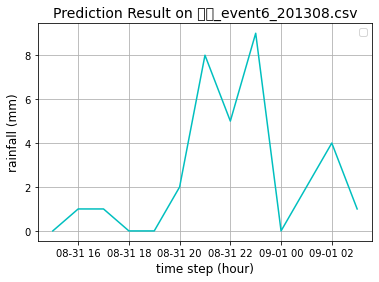

In [1971]:
start_index, end_index = 3, 16
X_summary = X[start_index:end_index]
Y_summary = Y[start_index:end_index]
prediction_X = X[test_seq_start_index:test_seq_start_index+predict_length]
# plt.plot(prediction_X, stacked_lstm_prediction, 'black', label='stacked LSTM')
# plt.plot(prediction_X, ed_lstm_prediction, 'r', label='encoder-decoder LSTM')
plt.plot(X_summary, Y_summary, 'c')

plt.title('Prediction Result on '+ str(test_seq_path), fontsize=14)
plt.ylabel('rainfall (mm)', fontsize=12)
plt.xlabel('time step (hour)', fontsize=12)
# plt.ylim(0,8)
plt.grid(True)
plt.legend()
plt.show()

### 秀巒水位站 流量 雨量站 比例
* 鎮西堡 0.16
* 白石 0.77
* 秀巒 0.07

In [1969]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4747096724305694247
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10086187008
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8343425224965397042
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [1970]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())

True
